In [1]:
%matplotlib inline

In [2]:
import numpy as np
import torch
import os
import sys
import re
import itertools
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from torch.utils.data import TensorDataset, DataLoader
from sklearn.decomposition import PCA

import pickle

import seaborn as sns
sns.set_context('paper')
sns.set_style('white')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 20})

/pkgs/anaconda37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data_dir = '/scratch/gobi2/tkillian/endomondo/model_states/userId_context/'

In [4]:
with open(data_dir+'evaluated_data.pkl','rb') as f:
    data_dict = pickle.load(f)

In [5]:
len(data_dict.keys())

138

In [63]:
w_id = list(data_dict.keys())[2]

In [64]:
data_dict[w_id].keys()

dict_keys(['encodings', 'target', 'hr_input', 'attention', 'sports', 'predictions', 'times', 'pca'])

In [65]:
target = np.array(data_dict[w_id]['target'])
predictions = np.array(data_dict[w_id]['predictions'])

In [66]:
truth = []
for ii in range(target.shape[0]):
    if ii < target.shape[0] - 1:
        truth.append(target[ii,0])
    else:
        truth.extend(target[ii,:])

In [67]:
preds1 = []
for jj in range(predictions.shape[0]):
    if jj < predictions.shape[0]-1:
        preds1.append(predictions[jj,0])
    else:
        preds1.extend(predictions[jj,:])
len(preds1)

289

In [68]:
target.shape

(280, 10)

In [69]:
preds = np.nan*np.ones((280, 289))
for jj in range(predictions.shape[0]):
    preds[jj, jj:jj+10] = predictions[jj,:]
preds_mean = np.nanmean(preds, axis=0)
preds_std = np.nanstd(preds, axis=0)

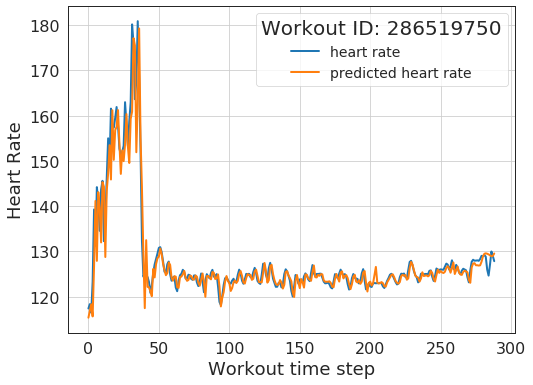

In [71]:
plt.figure(figsize=(8,6))
plt.plot(truth,lw=2, label='heart rate')
plt.plot(preds1,lw=2, label='predicted heart rate')
# plt.plot(preds_mean,lw=2, label='predicted heart rate')
# plt.fill_between(range(len(preds_mean)), preds_mean-preds_std, preds_mean+preds_std, color='orange', alpha=0.3)
plt.legend(loc=0, fontsize=14, title=f"Workout ID: {int(w_id)}")
plt.ylabel('Heart Rate', fontsize=18)
plt.xlabel('Workout time step', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

# Now onto PCA plots :)

In [34]:
len(data_dict[w_id]['sports']), len(data_dict[w_id]['pca'])

(280, 2800)

In [37]:
# Aggregate all PCA embeddings from all workouts
PCAs = np.empty((0,2))
sports = []
for w_id in data_dict.keys():
    PCAs = np.vstack([PCAs, data_dict[w_id]['pca']])
    sports.extend(np.tile(data_dict[w_id]['sports'],(1,10)).reshape(-1,1))

In [38]:
PCAs.shape, len(sports)

((606000, 2), 606000)

In [39]:
indexing = []
for ii, val in enumerate(sports):
    if val==0:
        indexing.append('Biking')
    else:
        indexing.append('Running')

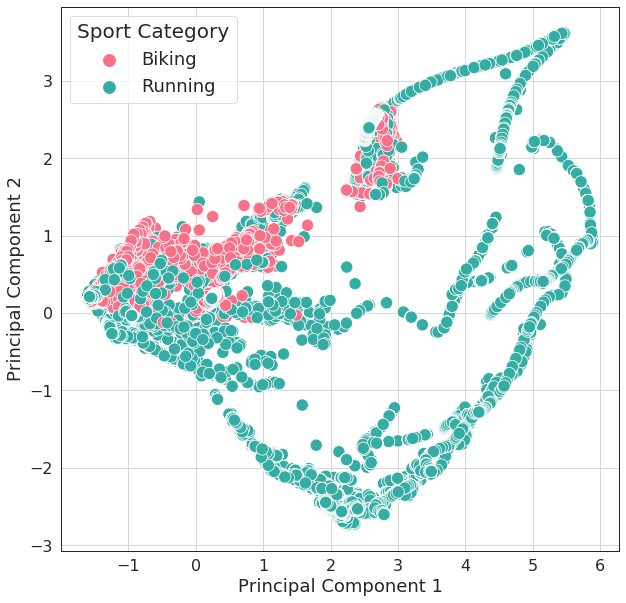

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=PCAs[:,0], y=PCAs[:,1], hue=indexing, palette='husl', s=150)
plt.legend(fontsize=18, markerscale=2.5, title="Sport Category")
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Principal Component 1", fontsize=18)
plt.ylabel("Principal Component 2", fontsize=18)
plt.show()